In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'acc':[],
           'f1':[],
           'g':[]}

In [4]:
gammas = [2,4,8,16]
lr = 1.0e-5


for g in gammas:
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=0.0,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          accumulation_steps=2,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search facebook/opt-350m, learning rate 1e-05 focal loss, gamma: 2


Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	8.9851	Val Loss:	1.6690	Accuracy:	0.3846	F1:	0.2976
2 / 30: Train Loss:	6.2889	Val Loss:	1.7293	Accuracy:	0.2988	F1:	0.2555
3 / 30: Train Loss:	6.1075	Val Loss:	1.8895	Accuracy:	0.2544	F1:	0.2102
4 / 30: Train Loss:	6.8163	Val Loss:	2.0622	Accuracy:	0.2574	F1:	0.1855
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.47      0.13      0.21        67
               anecdote       0.64      0.70      0.67        43
         cherry picking       0.29      0.34      0.31        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.09      1.00      0.17        13
      false equivalence       0.00      0.00      0.00        14
impossible expectations       0.24      0.43      0.31        37
           single cause       0.00    

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.7200	Val Loss:	1.7479	Accuracy:	0.3550	F1:	0.2735
2 / 30: Train Loss:	5.1842	Val Loss:	1.6348	Accuracy:	0.3402	F1:	0.2826
3 / 30: Train Loss:	5.7322	Val Loss:	2.6925	Accuracy:	0.1568	F1:	0.0986
4 / 30: Train Loss:	7.2584	Val Loss:	2.3609	Accuracy:	0.0385	F1:	0.0082
5 / 30: Train Loss:	6.4268	Val Loss:	2.3505	Accuracy:	0.0473	F1:	0.0176
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.00      0.00      0.00        67
               anecdote       0.00      0.00      0.00        43
         cherry picking       0.00      0.00      0.00        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.05      1.00      0.10        13
      false equivalence       0.04      0.21      0.06        14
impossible expectations       0

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	5.8616	Val Loss:	1.7548	Accuracy:	0.2899	F1:	0.2338
2 / 30: Train Loss:	3.4637	Val Loss:	1.6330	Accuracy:	0.3728	F1:	0.3118
3 / 30: Train Loss:	3.3215	Val Loss:	1.7921	Accuracy:	0.3136	F1:	0.2274
4 / 30: Train Loss:	2.6361	Val Loss:	1.8968	Accuracy:	0.2012	F1:	0.2175
5 / 30: Train Loss:	4.4497	Val Loss:	2.2414	Accuracy:	0.0651	F1:	0.0289
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.00      0.00      0.00        67
               anecdote       0.20      0.02      0.04        43
         cherry picking       0.00      0.00      0.00        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.00      0.00      0.00        12
           false choice       0.06      0.92      0.12        13
      false equivalence       0.00      0.00      0.00        14
impossible expectations       0

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	3.5079	Val Loss:	1.7824	Accuracy:	0.3077	F1:	0.2642
2 / 30: Train Loss:	1.4298	Val Loss:	1.5625	Accuracy:	0.4201	F1:	0.3267
3 / 30: Train Loss:	1.5132	Val Loss:	1.6330	Accuracy:	0.4172	F1:	0.3542
4 / 30: Train Loss:	1.7447	Val Loss:	2.2637	Accuracy:	0.1598	F1:	0.0971
5 / 30: Train Loss:	2.4892	Val Loss:	2.2328	Accuracy:	0.0592	F1:	0.0351
6 / 30: Train Loss:	1.7613	Val Loss:	2.2565	Accuracy:	0.0976	F1:	0.0618
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.00      0.00      0.00        67
               anecdote       0.00      0.00      0.00        43
         cherry picking       0.21      0.32      0.26        56
      conspiracy theory       0.00      0.00      0.00        39
           fake experts       0.07      0.25      0.11        12
           false choice       0.11      0.08      0.09        13
      false equivalence 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

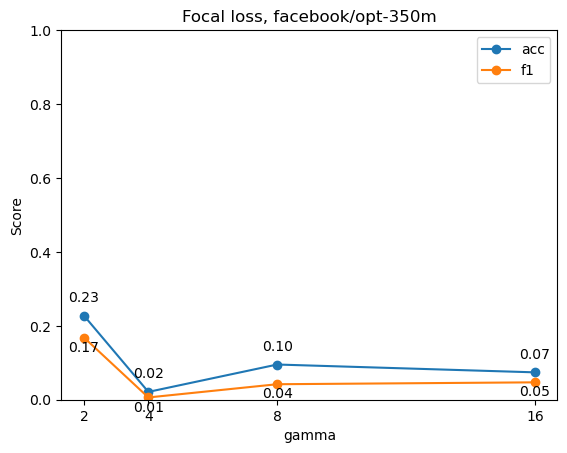

In [6]:
def plot_grid_search(df, title, column):

    # Create the plot
    ax = df.plot(x=column, y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row[column], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row[column], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df[column], [val for val in df[column]], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('gamma')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Focal loss, {model_checkpoint}', 'g')